# Company data 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
company = pd.read_csv("company_data.csv")

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [11]:
x = company.iloc[:,0:8]
y = company.iloc[:,8]

In [12]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age
0,9.50,138,73,11,276,120,0,42
1,11.22,111,48,16,260,83,1,65
2,10.06,113,35,10,269,80,2,59
3,7.40,117,100,4,466,97,2,55
4,4.15,141,64,3,340,128,0,38
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33
396,6.14,139,23,3,37,120,2,55
397,7.41,162,26,12,368,159,2,40
398,5.94,100,79,7,284,95,0,50


In [13]:
y

0      17
1      10
2      12
3      14
4      13
       ..
395    14
396    11
397    18
398    12
399    16
Name: Education, Length: 400, dtype: int64

In [14]:
num_trees = 100

In [15]:
max_features = 3

In [16]:
kfold = KFold(n_splits = 10)

In [17]:
model1 = RandomForestClassifier(n_estimators= num_trees, max_features= max_features)

In [18]:
model1

RandomForestClassifier(max_features=3)

In [19]:
results = cross_val_score(model1, x,y, cv=kfold)
print(results.mean())

0.10999999999999999


In [21]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
seed =7

In [24]:
cart = DecisionTreeClassifier()

In [26]:
mdl1 = BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state = seed)

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
results = cross_val_score(mdl1,x,y,cv=kfold)
print(results.mean())

0.1275


In [34]:
#BOOSTING

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
mdl2= AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [39]:
results = cross_val_score(mdl2,x,y,cv=kfold)
print(results.mean())

0.11499999999999999


<Axes: ylabel='Frequency'>

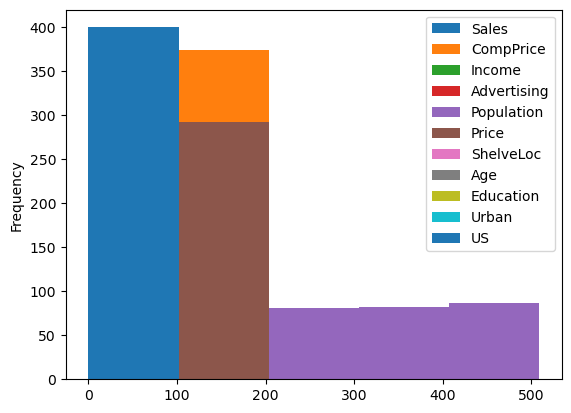

In [45]:
company.plot.hist(bins = 5)

<Axes: >

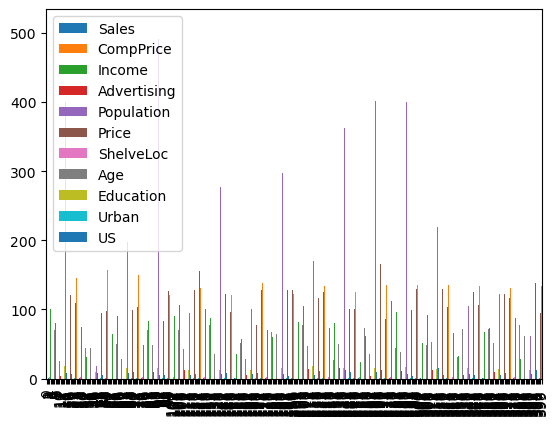

In [46]:
company.plot.bar()

# fraud data 

In [47]:
fraud = pd.read_csv("fraud_check.csv")

In [48]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [49]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])

In [50]:
fraud.drop('Urban',axis=1,inplace = True)

In [51]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [52]:
x = fraud.iloc[:,0:8]
y = fraud.iloc[:,-1]

In [53]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [54]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: urban, Length: 600, dtype: int32

In [55]:
num_trees = 10

In [56]:
max_features = 3

In [57]:
kfold = KFold(n_splits = 6,random_state=None )

In [58]:
model2 = RandomForestClassifier(n_estimators=num_trees, max_features= max_features)

In [59]:
model2

RandomForestClassifier(max_features=3, n_estimators=10)

In [60]:
results = cross_val_score(model2, x,y, cv=kfold)
print(results.mean())

1.0


In [61]:
#BAGGING

In [62]:
seed = 7

In [63]:
mdll1 = BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state = seed)

In [64]:
results = cross_val_score(mdll1,x,y,cv=kfold)
print(results.mean())

1.0


In [65]:
#BOOSTING

In [68]:
mdll2= AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [69]:
results = cross_val_score(mdll2,x,y,cv=kfold)
print(results.mean())

1.0


<Axes: ylabel='Frequency'>

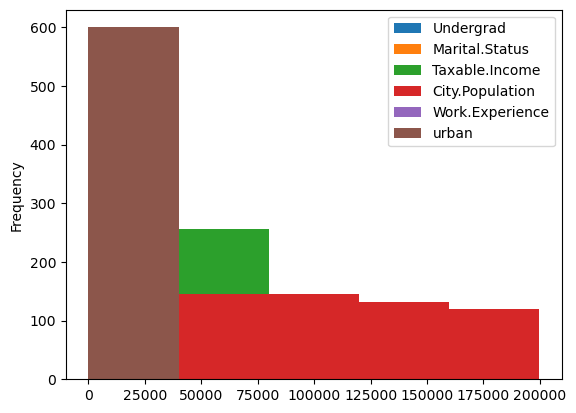

In [70]:
fraud.plot.hist(bins = 5)

<Axes: >

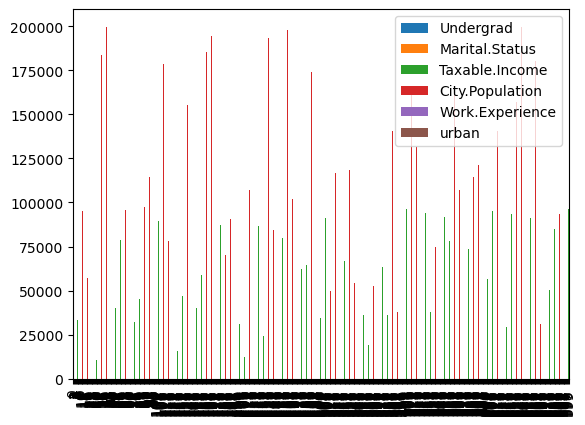

In [71]:
fraud.plot.bar()